In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as stm
from sklearn import linear_model
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox as LB


In [2]:
y = np.array([21.3333,22.6667,27.8294,30.4124,32.9520,14.2640,28.8415,27.8419,53.2665,19.1559,16.7668,55.6615,
     35.6406,30.3929,50.3441,40.2123,28.7693,33.9378,58.5428,44.5764,49.3091,50.4247,41.9638,62.7497,
     56.3852,41.9907,61.1028,58.6780,73.2081,66.2684,54.4457,67.6482,56.9542,64.9572,69.7775,61.5698,
     84.9554,57.4548,58.0847,88.6711,75.2904,79.9606,70.9618,83.2560,85.7562,76.4391,77.6164,85.2613,
     104.0068,74.5042,86.8909,94.7717,103.2406,100.7451,97.0038,78.8327,96.9834,102.6197,98.0549,83.8813,
     111.9083,118.8757,94.5341,105.2204,115.1087,119.6549,104.8529,107.0710,129.1234,109.7078,106.9881,
     139.7480,101.7890,103.0492,130.6339,114.8879,126.8285,126.5739,125.0049,143.9181,111.3871,139.3483,
     131.1971,139.8066,134.0294,131.5055,138.3898,130.1479,142.5471,151.6323,143.3908,134.7999,151.3457,
     147.6873,143.3519,151.3348,143.1829,160.5847,147.4983,163.1111,154.0063,155.9284,150.6340,185.3708,
     156.5745,161.2122,160.3083,164.8771,149.9788,186.9586,174.4658,157.6656,166.4182,185.9162,175.4570,
     180.4779,183.1741,179.0722,176.4521,182.3102,180.6805,192.9606,166.6624,196.1941,204.3302,166.0524,
     197.4435,203.4331,182.9194,199.0849,195.7082,192.6015,182.5659,198.6555,192.8288,200.6871,203.5176,
     204.4451,199.6403,193.4589,216.7572,202.2302,214.3964,220.0236,206.6291,198.8249,207.9889,231.3487,
     210.9570,215.7860,217.7013,217.5601,235.6657,211.7818,237.4417,227.7584,235.0806,218.3528,230.5214,
     246.4117,227.7168,210.6495,264.0180,237.5281,251.9805,235.9781,247.4135,230.6109,243.7570,256.7107,
     252.7107,233.9085,269.4156,247.2615,240.1998,246.4124,267.3122,258.3539,256.3502,252.6688,262.7675,
     257.0177,269.8386,262.4560,267.8276,273.2983,258.8461,282.0778,265.0453,261.5477,273.9821,277.2504,
     283.9545,268.6449,280.3142,285.1080,282.3552,299.6049,286.6788,264.3836])


In [3]:
t = np.arange(1,201)
t = sm.add_constant(t)
model = sm.OLS(y,t, hasconst = True)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.209e+04
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          1.84e-179
Time:                        13:09:00   Log-Likelihood:                -739.77
No. Observations:                 200   AIC:                             1484.
Df Residuals:                     198   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3505      1.395     15.308      0.0

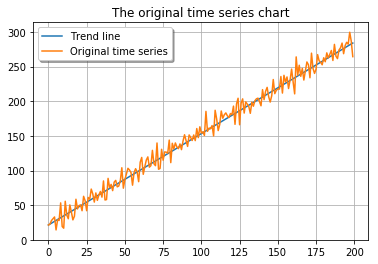

In [4]:
l = [i*1.32+21.35 for i in range(len(y))]

plt.plot(l, label='Trend line')
plt.plot(y, label='Original time series')
plt.grid()
plt.legend(loc='upper left', shadow=True)
plt.title('The original time series chart')

plt.show()

Time series has a clear leniar trend

In [5]:
p_vals= stm.tsa.arima_model.ARMA(y,order=(6,0),exog=np.arange(1,201)).fit().pvalues[2:9]
print("alpha1 p-value",p_vals[0])
print("alpha2 p-value",p_vals[1])
print("alpha3 p-value",p_vals[2])
print("alpha4 p-value",p_vals[3])
print("alpha5 p-value",p_vals[4])
print("alpha6 p-value",p_vals[5])

alpha1 p-value 4.243073744516326e-10
alpha2 p-value 1.5517332663930818e-07
alpha3 p-value 0.23994922759009082
alpha4 p-value 0.9305718637464889
alpha5 p-value 0.9891525001597298
alpha6 p-value 0.877821430765301


Only alpha1 and alpha2 are significant. That mean we could use ADF-test with two lags and check the hypothesis H0 that the model  has one unit root.

In [6]:
print ('Model with two lags')
test = sm.tsa.adfuller(y,maxlag= 2,regression='ct', autolag = None)
print ('ADF-test statistics: ', test[0],'\n','p-value: ', test[1],'\n','Critical value: ', test[4],'\n','Number of lugs:',test[2] ) 
if test[0]> test[4]['5%']: 
    print ('Model has a unit root, hipotesis is not rejected')
else:
    print ('Model has not a unit root, hipotesis is rejected')

Model with two lags
ADF-test statistics:  -11.780478271034037 
 p-value:  8.844317042334673e-19 
 Critical value:  {'1%': -4.005474880049672, '5%': -3.4330150618380553, '10%': -3.1402789366915127} 
 Number of lugs: 2
Model has not a unit root, hipotesis is rejected


We rejected H0, time-series is trend stationary process. At the next step we need to subtract the trend from the series

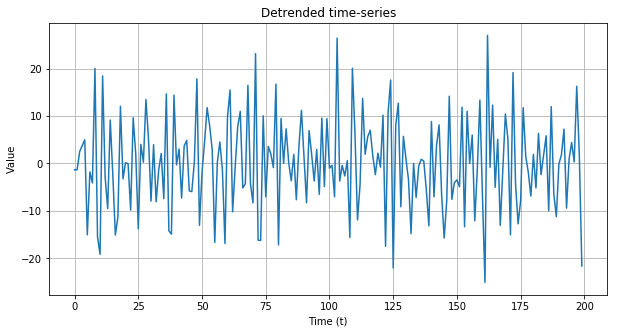

In [7]:
ind = results.params[0]
t_coef = results.params[1]

y_det = np.array([y[i] - t[i]*t_coef - ind for i in range(200)])[:,1]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(y_det)    

ax.set(xlabel='Time (t)', ylabel='Value',
       title='Detrended time-series')
ax.grid()

In [8]:
test = sm.tsa.adfuller(y_det,regression='ct')
print ('ADF-test statistics: ', test[0],'\n','p-value: ', test[1],'\n','Critical value: ', test[4],'\n','Number of lugs:',test[2] ) 
if test[0]> test[4]['5%']: 
    print ('Model has a unit root, hipotesis is not rejected')
else:
    print ('Model has not a unit root, hipotesis is rejected')

ADF-test statistics:  -16.749138250018767 
 p-value:  0.0 
 Critical value:  {'1%': -4.005235140049614, '5%': -3.4329000694219, '10%': -3.1402115863254525} 
 Number of lugs: 1
Model has not a unit root, hipotesis is rejected


To identify the model we need to look at autocorrelation and partial autocorrelation function of series

[ 1.         -0.30526821 -0.24707727  0.14134189  0.06739749 -0.07858409
  0.00101671  0.08155622  0.03042871 -0.20562257  0.20416172 -0.05488077
 -0.01463683  0.03931343  0.06915498 -0.05136239 -0.02189363  0.04048514
  0.05741984 -0.19091342  0.09664438  0.07921451 -0.04910707 -0.07015715
  0.00936844  0.08181802 -0.00850587 -0.1079768   0.12381634  0.00858501
 -0.08609963 -0.0770926   0.08645826  0.03885847 -0.11504509  0.12072781
 -0.04386318 -0.10665173  0.11481947 -0.00350801  0.02181365]
[ 1.00000000e+00 -3.06802221e-01 -3.79413921e-01 -1.01270295e-01
 -1.88060538e-03 -1.84995495e-02  7.17560067e-04  7.22620256e-02
  1.19763206e-01 -1.45736161e-01  1.28533114e-01 -6.54746152e-02
  6.57860687e-02  4.19940481e-02  1.32527427e-01  6.08480617e-02
  3.89862017e-02  3.88801408e-02  4.89638487e-02 -1.43415866e-01
 -6.59039009e-02  1.94218741e-02  1.89565385e-02 -2.37498429e-02
 -1.08187123e-01  3.29168764e-02  3.20912941e-02 -7.86044804e-02
  6.36039776e-03  8.37757640e-02 -1.38706755e

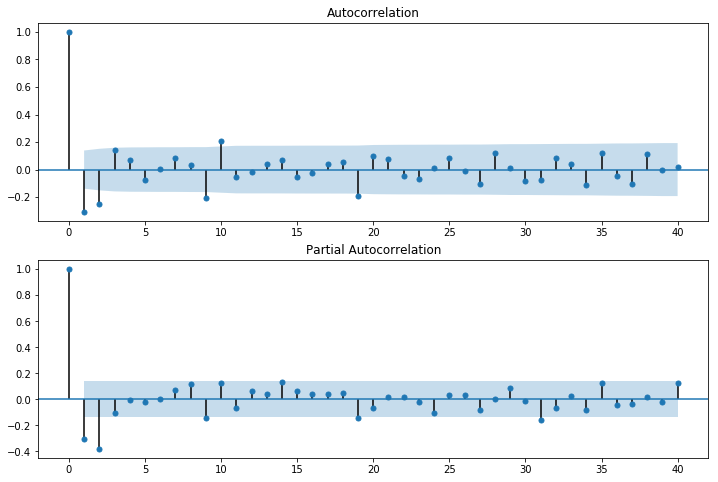

In [9]:
rho = sm.tsa.stattools.acf(y_det)
phi = sm.tsa.stattools.pacf(y_det)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_det, lags=40, ax=ax1,alpha=.05)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_det, lags=40, ax=ax2,alpha=.05)
print(rho[:])
print(phi[:])

The sample ACF exhibits exponential decay and is significantly greater than zero at k=1,2,9,10 the values are outside the confidence interval. The sample PACF has significant correlation structures at k=1, k=2, and falls inside confidence intreval after k=2. So, we coul use the AR(2) model. But we also compare AR(1) and AR(3) models using AIC and BIC criteria.


In [10]:
model2 = stm.tsa.arima_model.ARIMA(y_det, (2,0,0))
model2_fit = model2.fit( trend='nc', method='css-mle')
print(model2_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(2, 0)   Log Likelihood                -714.076
Method:                       css-mle   S.D. of innovations              8.588
Date:                Sun, 09 Jun 2019   AIC                           1434.152
Time:                        13:09:05   BIC                           1444.047
Sample:                             0   HQIC                          1438.156
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4313      0.066     -6.529      0.000      -0.561      -0.302
ar.L2.y       -0.3842      0.066     -5.844      0.000      -0.513      -0.255
                                    Roots           

In [11]:
model1 = stm.tsa.arima_model.ARIMA(y_det, (1,0,0))
print(model1.fit( trend='nc', method='mle').summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(1, 0)   Log Likelihood                -729.781
Method:                           mle   S.D. of innovations              9.297
Date:                Sun, 09 Jun 2019   AIC                           1463.562
Time:                        13:09:05   BIC                           1470.159
Sample:                             0   HQIC                          1466.231
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.3113      0.068     -4.587      0.000      -0.444      -0.178
                                    Roots                                    
                  Real          Imaginary           M

In [12]:
model3 = stm.tsa.arima_model.ARIMA(y_det, (3,0,0))
print(model3.fit( trend='nc', method='mle').summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(3, 0)   Log Likelihood                -713.085
Method:                           mle   S.D. of innovations              8.545
Date:                Sun, 09 Jun 2019   AIC                           1434.170
Time:                        13:09:05   BIC                           1447.364
Sample:                             0   HQIC                          1439.510
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4684      0.071     -6.616      0.000      -0.607      -0.330
ar.L2.y       -0.4271      0.072     -5.922      0.000      -0.568      -0.286
ar.L3.y       -0.1001      0.071     -1.411      0.1

AR(2) model is better then others, we should chose it as the optimal one.
Analyze the residuals.

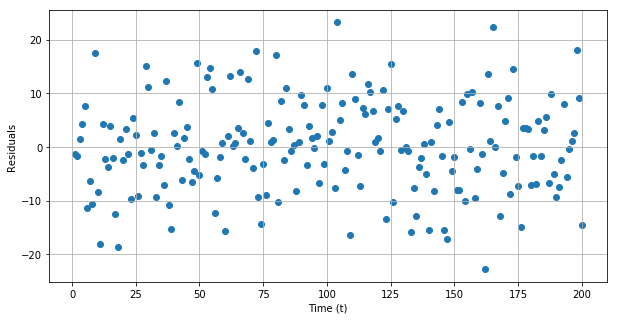

In [13]:
residuals = pd.DataFrame(model2_fit.resid)
x=np.arange(1,201)
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,residuals)    

ax.set(xlabel='Time (t)', ylabel='Residuals')
ax.grid()

In [14]:
jb_test = jarque_bera(residuals)
print('The Kurtosis of the residuals is:',jb_test[3],'\n','The Skew of the residuals is:',jb_test[2],'\n','JB statistics:', jb_test[0],'\n','p-value:',jb_test[1],'\n')
print('Data have a normal distribution')

The Kurtosis of the residuals is: [2.80432654] 
 The Skew of the residuals is: [0.04653286] 
 JB statistics: [0.39124445] 
 p-value: [0.82232283] 

Data have a normal distribution


Checking for white noise of the residuals with Ljung and Box test

In [15]:
LB_test = LB(y_det,lags=20)
print('Ljung-Box test statistic:', LB_test[0])
print('p-value:', LB_test[1])

Ljung-Box test statistic: [18.9187069  31.3747972  35.47171188 36.40800685 37.68743523 37.68765049
 39.07996786 39.27479404 48.21792406 57.08083529 57.72464853 57.77068668
 58.10459062 59.14335105 59.71945389 59.82469831 60.18654253 60.91841262
 69.05375261 71.15009408]
p-value: [1.36408476e-05 1.53832944e-07 9.68411610e-08 2.38502832e-07
 4.35996255e-07 1.29286436e-06 1.88700511e-06 4.37065827e-06
 2.32537158e-07 1.28713527e-08 2.44621127e-08 5.73517994e-08
 1.14358045e-07 1.65710666e-07 2.81813385e-07 5.60187099e-07
 9.78954813e-07 1.45257011e-06 1.32032813e-07 1.18071187e-07]


Residuals are "white noise", hypotesis is not rejected